<a href="https://colab.research.google.com/github/josho08/cd-my-first-repo/blob/main/Building_Settlement_CLASIFICATION02_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Mar  7 14:18:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [49]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yxAb3QZa8h8eojoqrMiQ")
project = rf.workspace("test-bmztb").project("building-segmentation-uyzyp")
version = project.version(1)
dataset = version.download("yolov8")



mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Building-segmentation-1 in yolov8:: 100%|██████████| 1936/1936 [00:00<00:00, 7300.78it/s]


In [50]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Building-segmentation-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, v

In [52]:
!ls {HOME}/runs/detect/train7

args.yaml					     R_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	 val_batch0_pred.jpg
confusion_matrix.png				     results.png	 val_batch1_labels.jpg
events.out.tfevents.1709822874.0a36851e73b6.11203.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					     train_batch500.jpg  weights
P_curve.png					     train_batch501.jpg
PR_curve.png					     train_batch502.jpg


In [53]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train7/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Building-segmentation-1/valid/labels.cache... 114 images, 2 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:07<00:00,  1.05it/s]
                   all        114        417      0.807      0.731      0.803      0.629
Speed: 12.2ms preprocess, 15.7ms inference, 0.0ms loss, 11.9ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


/content


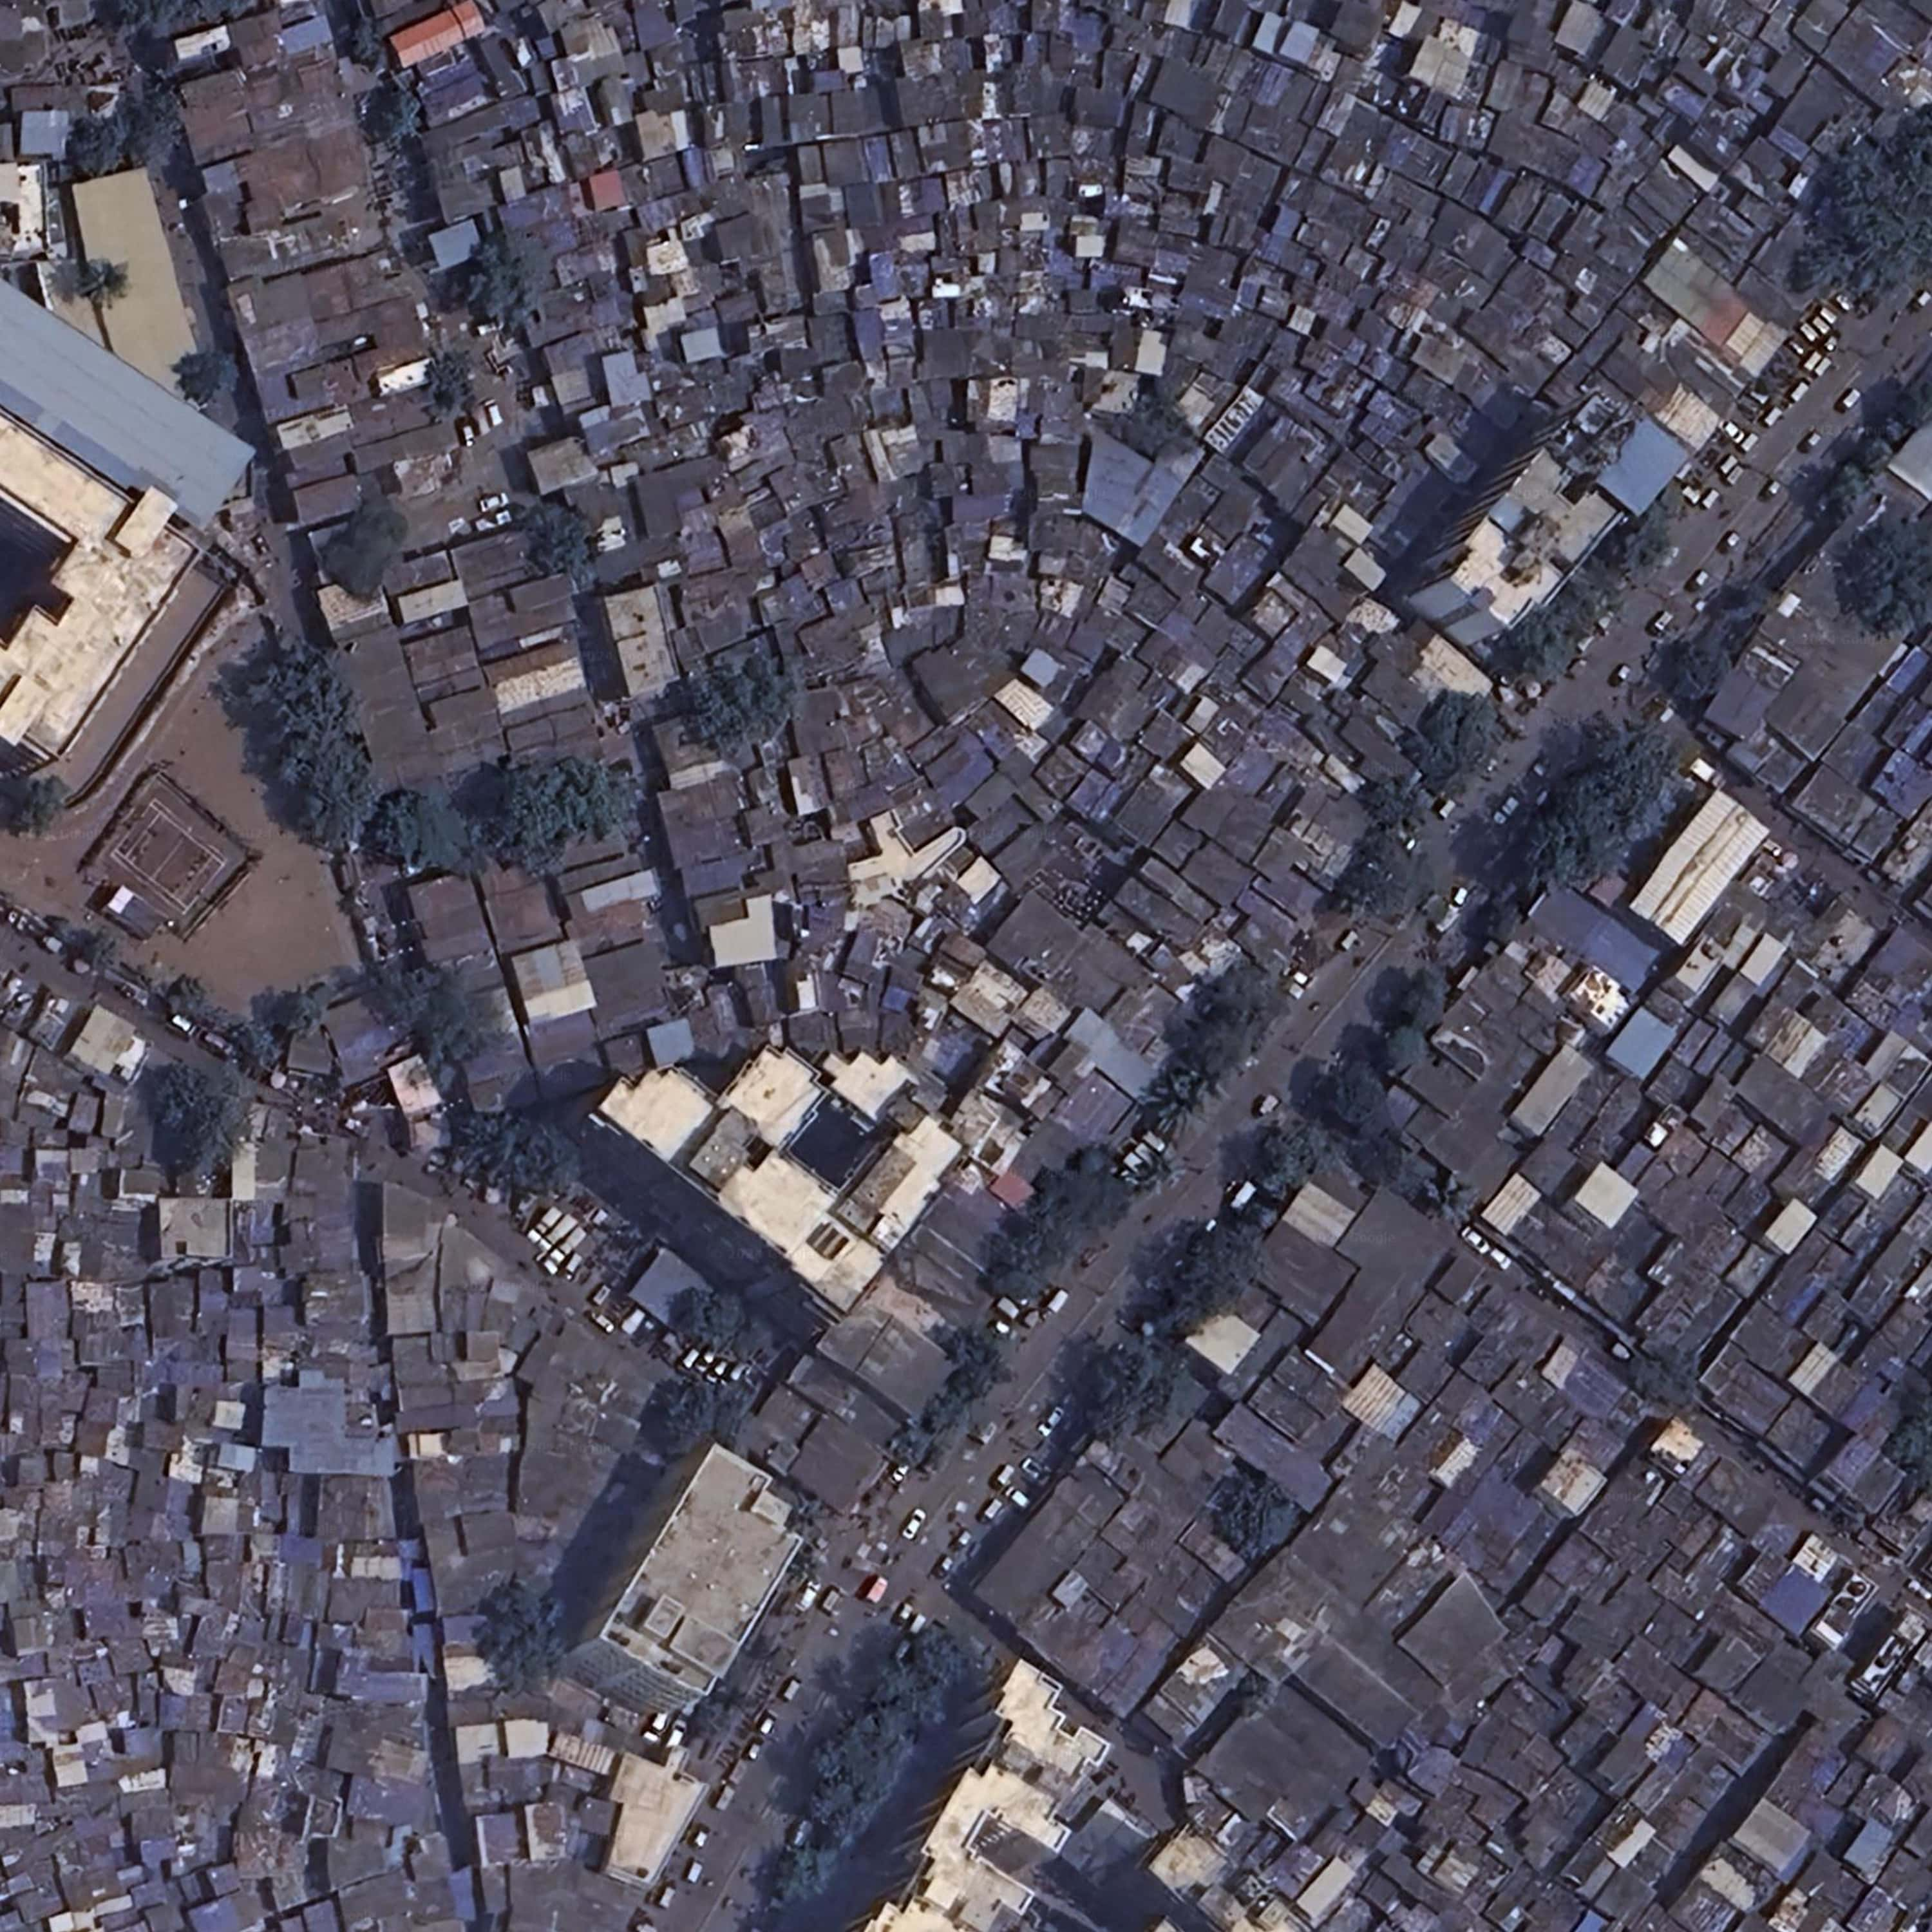

In [54]:
%cd {HOME}
Image(filename=f'/content/Artboard 1 copy 3.jpg', width=800)

In [55]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train7/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Building-segmentation-1/valid/labels.cache... 114 images, 2 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:08<00:00,  1.03s/it]
                   all        114        417      0.807      0.731      0.803      0.629
Speed: 12.5ms preprocess, 15.5ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [57]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train7/weights/best.pt conf=0.25 source="/content/Artboard 1 copy 3.jpg" save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/Artboard 1 copy 3.jpg: 800x800 300 Batiments, 28.9ms
Speed: 8.8ms preprocess, 28.9ms inference, 515.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


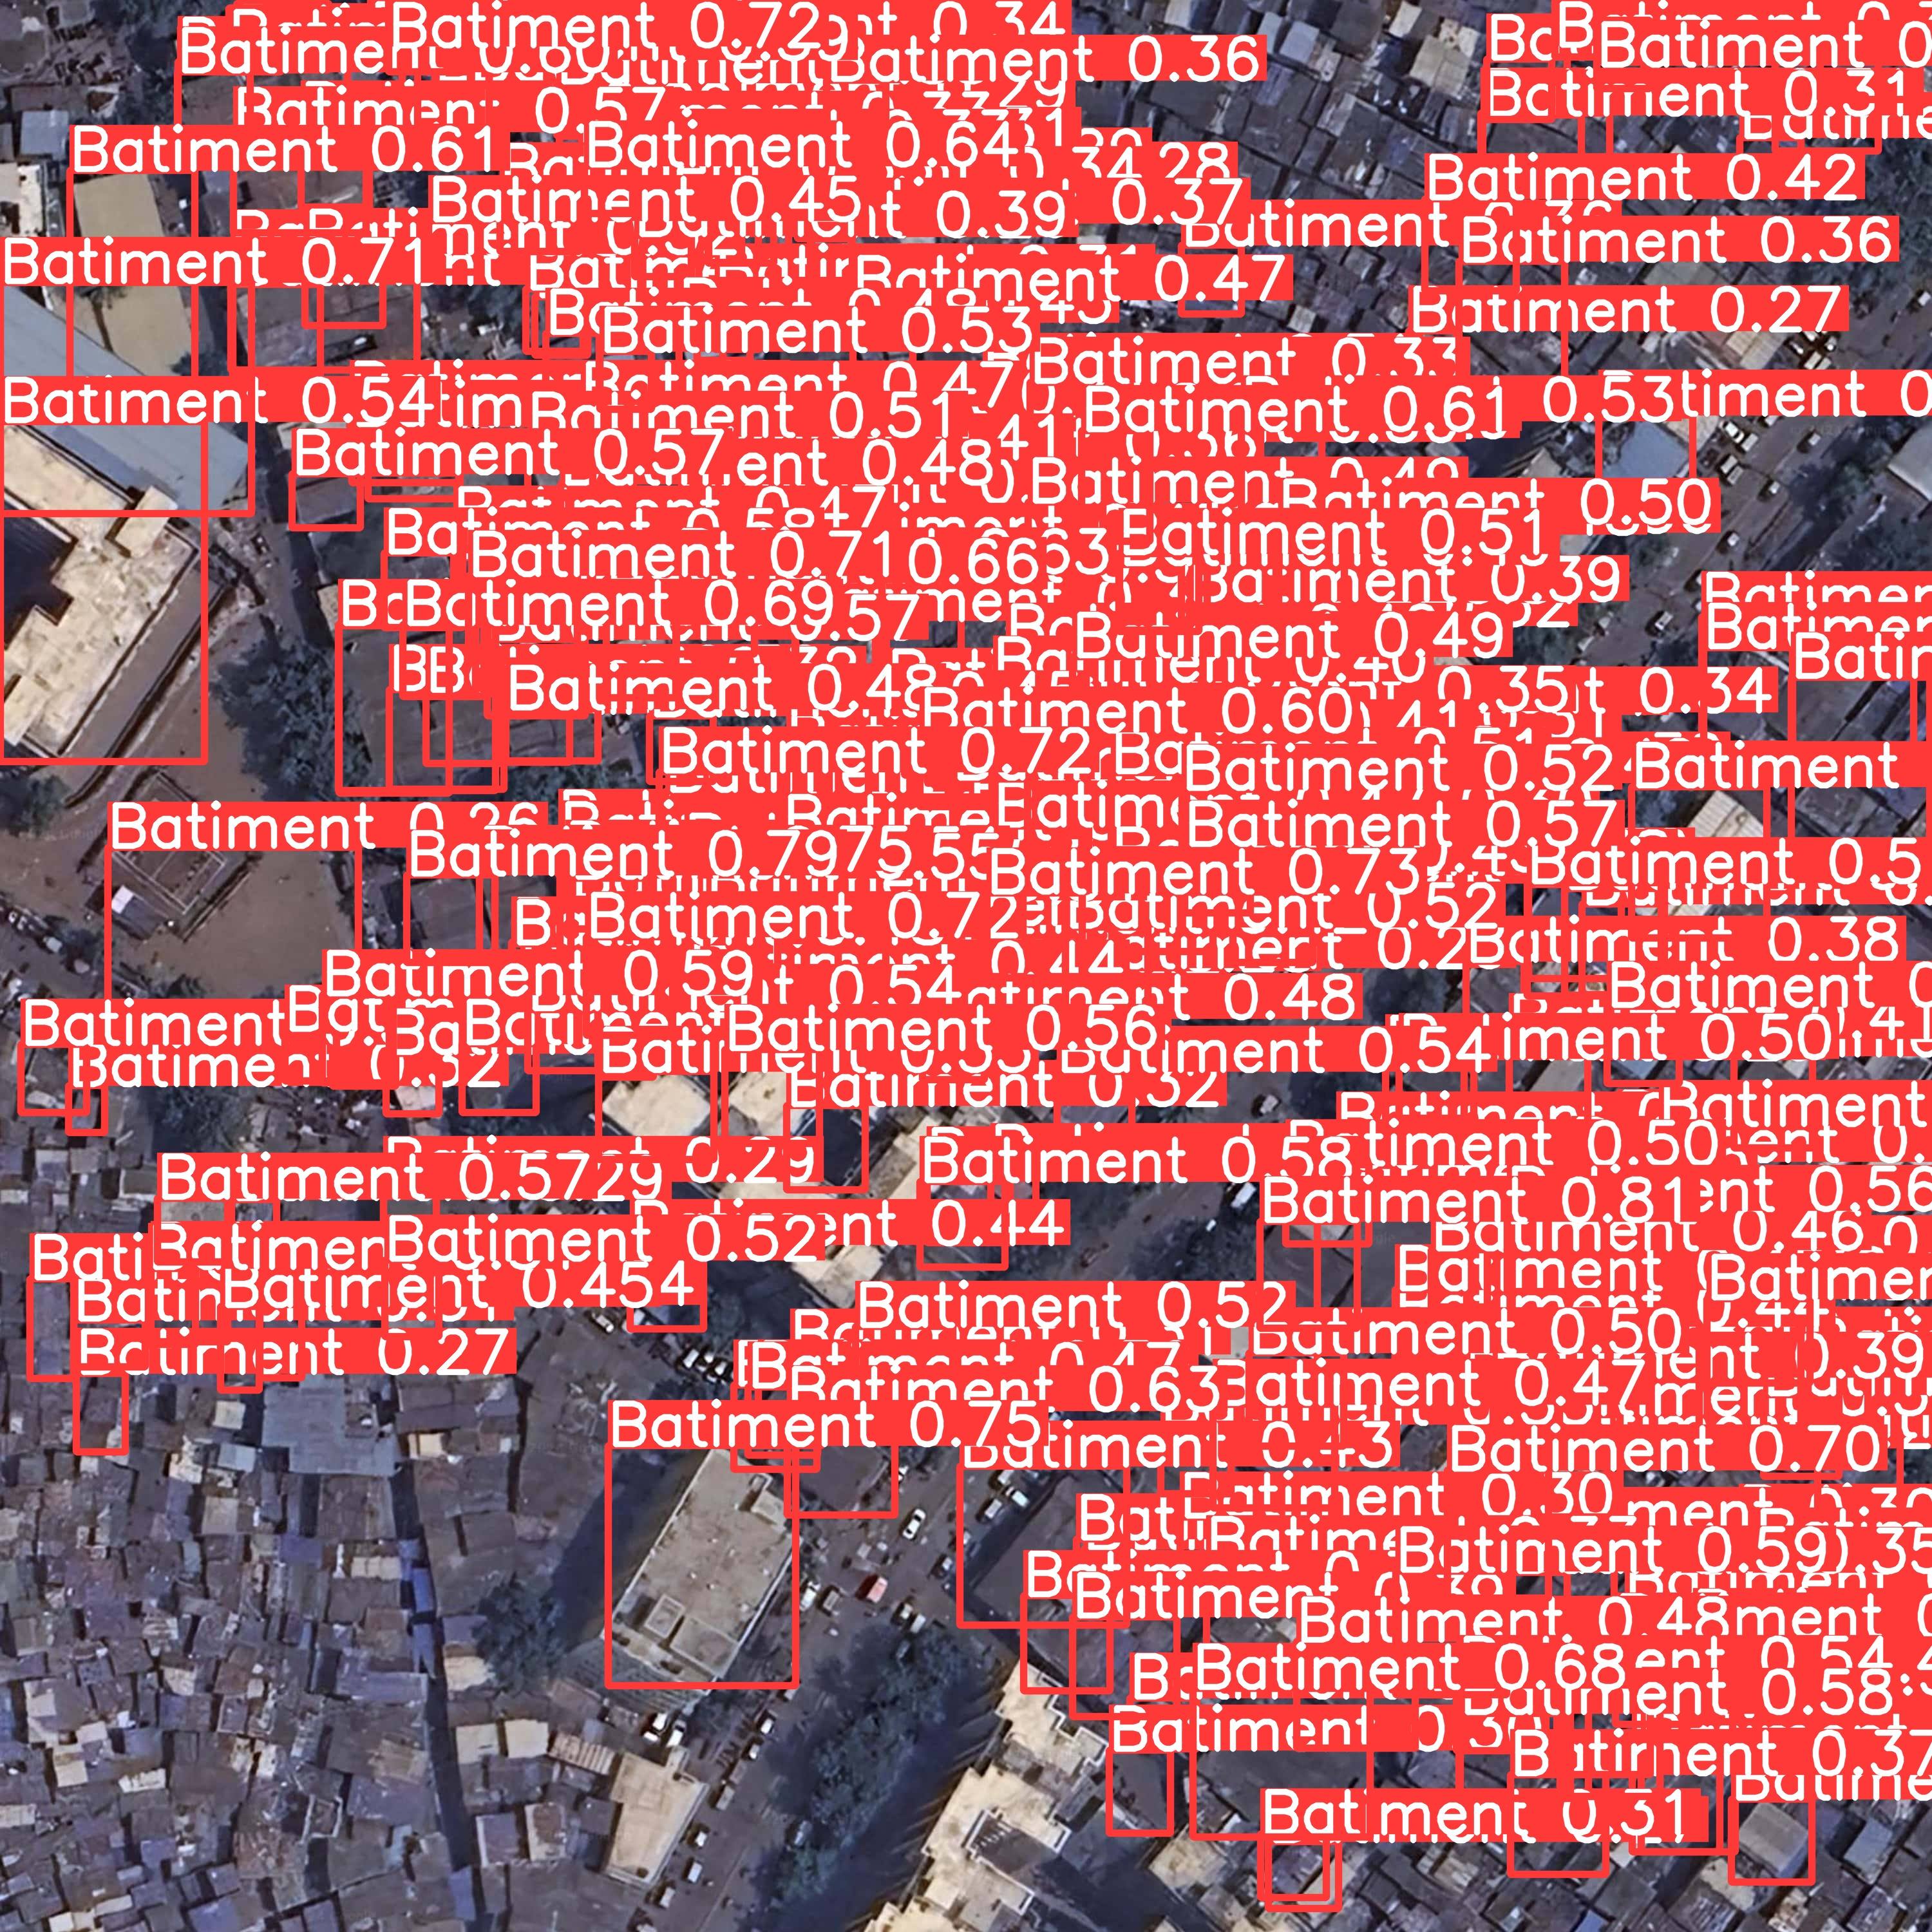

In [58]:
import glob
from IPython.display import Image, display

# Define the directory where your JPG format images are located
directory = "/content/runs/detect/predict6"

# Use glob to find all JPG format images in the directory
jpg_files = glob.glob(f"{directory}/*.jpg")

# Display each JPG format image
for jpg_file in jpg_files:
    display(Image(filename=jpg_file))


In [ ]:
predict = !yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="/content/Artboard 1 copy 3.jpg" save=True

In [ ]:
import glob
from IPython.display import Image, display

# Define the directory where your JPG format images are located
directory = "/content/runs/detect/predict5"

# Use glob to find all JPG format images in the directory
jpg_files = glob.glob(f"{directory}/*.jpg")

# Display each JPG format image
for jpg_file in jpg_files:
    display(Image(filename=jpg_file))